In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/my-datasets/advertising.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt

In [3]:
adv_df = pd.read_csv('../input/my-datasets/advertising.csv')
adv_df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [4]:
adv_df.info()
adv_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


# **Exploratory Data Analysis**

Text(0.5, 0, 'Age')

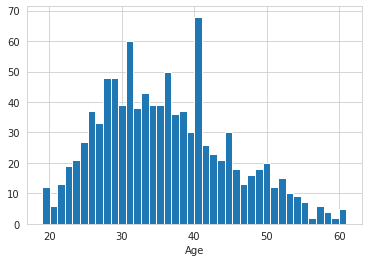

In [5]:
sns.set_style('whitegrid')
adv_df['Age'].hist(bins = 40)
plt.xlabel('Age')

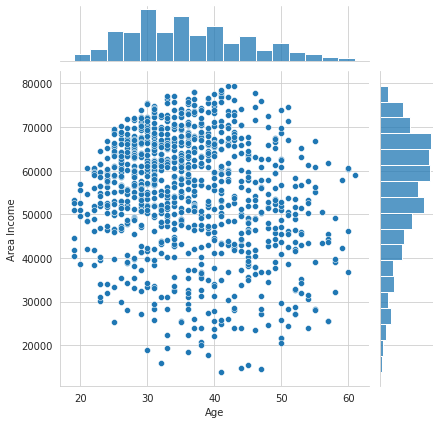

In [6]:
sns.jointplot(x = 'Age', y = 'Area Income', data = adv_df )

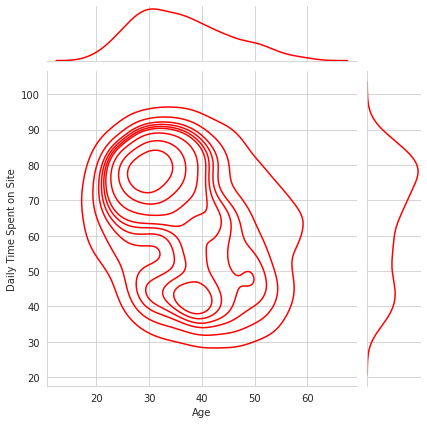

In [7]:
sns.jointplot(x = 'Age', y = 'Daily Time Spent on Site', data = adv_df, kind = 'kde', color = 'red')

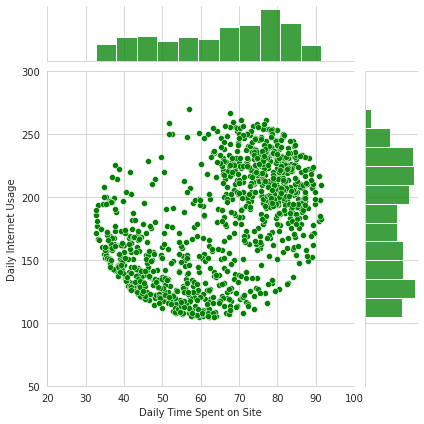

In [8]:
sns.jointplot(x = 'Daily Time Spent on Site', y = 'Daily Internet Usage', data = adv_df, color = 'g', xlim = [20,100], ylim = [50,300])

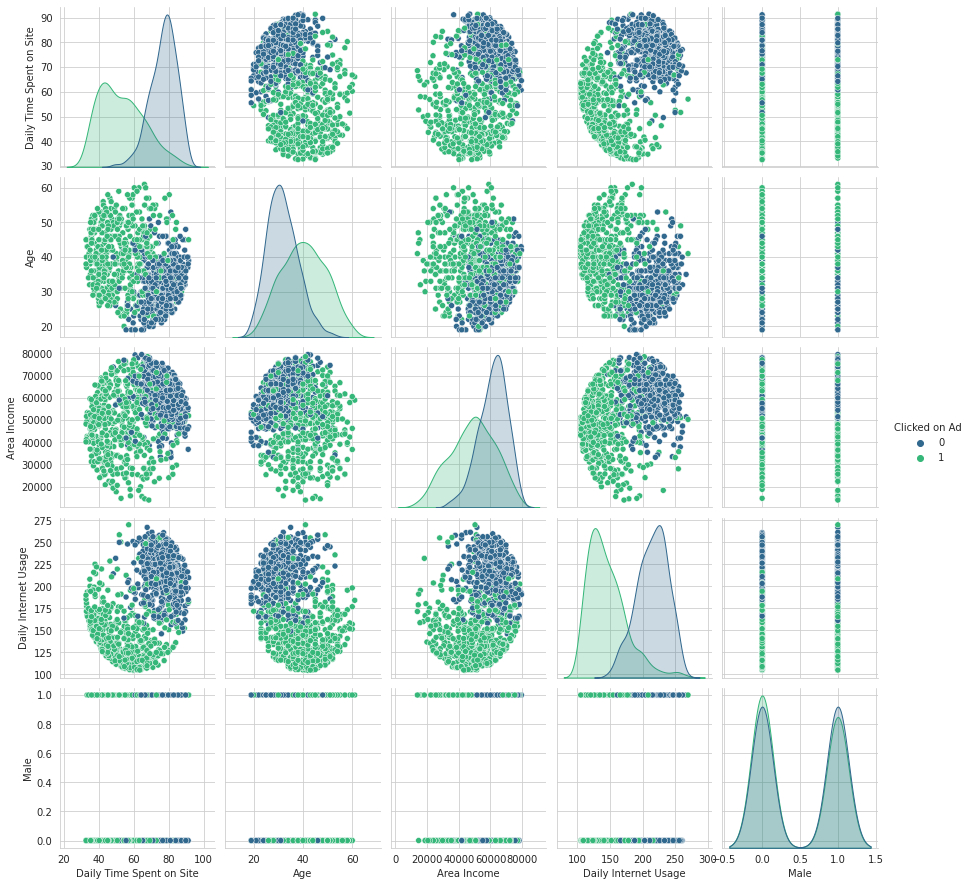

In [9]:
sns.pairplot(data = adv_df, hue = 'Clicked on Ad', palette = 'viridis')

# **Logistic Regression**

In [10]:
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [11]:
adv_df['Timestamp'] = pd.to_datetime(adv_df['Timestamp'])

In [12]:
def int_convert(time):
    return int(time.strftime("%Y%m%d%H%M%S"))
adv_df['Timestamp'] = adv_df['Timestamp'].apply(int_convert)
adv_df['Timestamp'].head()

0    20160327005311
1    20160404013902
2    20160313203542
3    20160110023119
4    20160603033618
Name: Timestamp, dtype: int64

In [13]:
adv_df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,20160327005311,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,20160404013902,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,20160313203542,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,20160110023119,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,20160603033618,0


In [14]:
le = LabelEncoder()
advcat = adv_df[['Ad Topic Line','City','Country','Timestamp']]

In [15]:
advcat = advcat.apply(le.fit_transform)
advcat.head()

,Ad Topic Line,City,Country,Timestamp
0,91,961,215,439
1,464,903,147,474
2,566,111,184,367
3,903,939,103,56
4,766,805,96,767


Note: Incase the Indexing error happens for not getting unique index, then add set_index()

In [16]:
advcat.set_index('City')

,Ad Topic Line,Country,Timestamp
City,,,
961,91,215,439
903,464,147,474
111,566,184,367
939,903,103,56
805,766,96,767
...,...,...,...
126,345,116,202
488,359,26,567
798,263,140,150


In [17]:
adv_df.drop(['Ad Topic Line','City','Country','Timestamp'], axis = 1, inplace = True)

In [18]:
adv_df = pd.concat([adv_df,advcat],axis = 1)
adv_df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,Ad Topic Line,City,Country,Timestamp
0,68.95,35,61833.90,256.09,0,0,91,961,215,439
1,80.23,31,68441.85,193.77,1,0,464,903,147,474
2,69.47,26,59785.94,236.50,0,0,566,111,184,367
3,74.15,29,54806.18,245.89,1,0,903,939,103,56
4,68.37,35,73889.99,225.58,0,0,766,805,96,767


In [19]:
adv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Male                      1000 non-null   int64  
 5   Clicked on Ad             1000 non-null   int64  
 6   Ad Topic Line             1000 non-null   int64  
 7   City                      1000 non-null   int64  
 8   Country                   1000 non-null   int64  
 9   Timestamp                 1000 non-null   int64  
dtypes: float64(3), int64(7)
memory usage: 78.2 KB


In [20]:
x_train, x_test, y_train, y_test = train_test_split(adv_df.drop('Clicked on Ad', axis = 1), adv_df['Clicked on Ad'], test_size = 0.30, random_state = 34)

In [21]:
adv_df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,Ad Topic Line,City,Country,Timestamp
0,68.95,35,61833.90,256.09,0,0,91,961,215,439
1,80.23,31,68441.85,193.77,1,0,464,903,147,474
2,69.47,26,59785.94,236.50,0,0,566,111,184,367
3,74.15,29,54806.18,245.89,1,0,903,939,103,56
4,68.37,35,73889.99,225.58,0,0,766,805,96,767


In [22]:
adv_df['Timestamp']

0      439
1      474
2      367
3       56
4      767
      ... 
995    202
996    567
997    150
998    422
999    772
Name: Timestamp, Length: 1000, dtype: int64

In [23]:
logmodel = LogisticRegression(solver = 'liblinear')
logmodel.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

In [24]:
pred_y = logmodel.predict(x_test)

In [25]:
from sklearn.metrics import classification_report, confusion_matrix

In [26]:
print(classification_report(y_test,pred_y))

              precision    recall  f1-score   support

           0       0.89      0.96      0.93       155
           1       0.95      0.88      0.91       145

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



In [27]:
print(confusion_matrix(y_test, pred_y))

[[149   6]
 [ 18 127]]
